In [1]:
%matplotlib inline

In [2]:
import cPickle as pickle
import numpy as np
import PIL

import json

In [3]:
received = None
with open('receivedImage.pkl', 'rb') as fin:
    received = pickle.load(fin)

In [4]:
encoded = received['the_file'].split(',')

imgData = encoded[1]
ext = encoded[0].split('/')[1].split(';')[0]

# or, more concisely using with statement
with open("imageToSave." + ext, "wb") as fh:
    fh.write(imgData.decode('base64'))

In [5]:
type(imgData.decode('base64'))

str

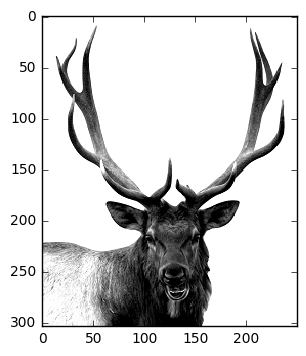

In [6]:
import base64
import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

i = base64.b64decode(imgData)
i = io.BytesIO(i)
i = mpimg.imread(i, format=ext)

plt.imshow(i, interpolation='nearest')
plt.show()

In [7]:
type(i)

numpy.ndarray

In [8]:
i.shape

(304L, 250L, 4L)

In [9]:
np.average(i)

0.85505044

In [10]:
tmp = 'hello'
name = tmp if tmp else 'goodbye'
name

'hello'

In [11]:

from laserCAM import Project, Image, Engraving, Laser

In [12]:
project = None

In [13]:
project = Project(name='TestProject')

In [14]:
image = Image(image_data=i, original_extension=ext)

0.0 0.85505 1.0


In [15]:
project.image = image

In [16]:
print type(project.image.image_data)

<type 'numpy.ndarray'>


In [17]:
del image

In [18]:
print type(project.image.image_data)

<type 'numpy.ndarray'>


In [19]:
data = np.asarray([12, 240, 241, 242, 245, 250, 251, 253, 255])
data[data>=245] = 255
data

array([ 12, 240, 241, 242, 255, 255, 255, 255, 255])

In [20]:
np.where(data < 255)[0][0], np.where(data < 255)[0][-1], np.where(data < 255)[0]

(0, 3, array([0, 1, 2, 3], dtype=int64))

In [21]:
np.where(data[::-1] > 255)[0]

array([], dtype=int64)

In [22]:
from laserCAM import Project, Image, Preprocessor

In [23]:
project = Project()

In [24]:
image = Image(i)

0.0 0.85505 1.0


In [25]:
i.shape

(304L, 250L, 4L)

In [26]:
preproc = Preprocessor(ignore_white=True, split_white=False, white_cutoff=240)

In [27]:
project.image = image
project.preprocessor = preproc

In [28]:
project.generate_gcode()

Terminators:  [(29, 155), (26, 156), (23, 156), (11, 157), (11, 157), (23, 157), (13, 157), (13, 157), (14, 157), (20, 157), (15, 157), (7, 157), (7, 157), (8, 158), (6, 159), (27, 160), (15, 160), (20, 161), (8, 161), (22, 161), (23, 162), (19, 162), (23, 162), (33, 162), (8, 163), (25, 163), (2, 163), (29, 163), (17, 164), (0, 164), (1, 165), (1, 165), (4, 165), (6, 165), (1, 165), (1, 165), (0, 165), (0, 165), (0, 165), (1, 165), (7, 165), (8, 164), (8, 164), (0, 164), (0, 163), (2, 163), (2, 163), (1, 162), (2, 162), (3, 161), (1, 161), (2, 161), (1, 162), (0, 163), (1, 163), (1, 163), (4, 163), (7, 162), (6, 162), (13, 161), (18, 161), (13, 161), (2, 161), (6, 161), (4, 162), (11, 162), (0, 162), (1, 163), (2, 163), (0, 162), (0, 162), (0, 162), (0, 162), (0, 162), (0, 161), (0, 161), (0, 161), (0, 160), (0, 160), (0, 159), (0, 159), (0, 158), (91, 158), (92, 157), (93, 157), (94, 157), (95, 157), (96, 157), (96, 158), (97, 158), (97, 159), (96, 159), (94, 160), (92, 162), (84, 16

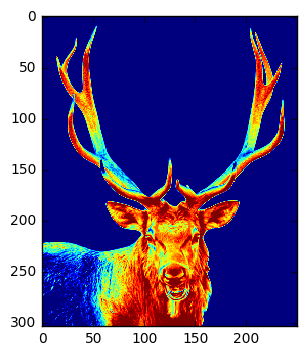

In [29]:
plt.imshow(project.image.normalized_data[::-1], interpolation='nearest')
plt.show()

In [45]:
[1,2,3,4,5,6][:-1]

[1, 2, 3, 4, 5]

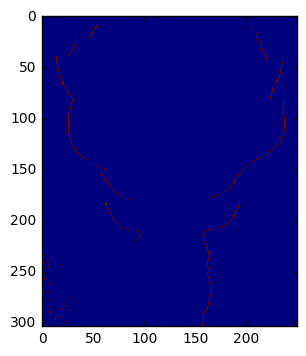

In [39]:
j = np.zeros_like(a=project.image.normalized_data)

for rowNum, row in enumerate(project.preprocessor._terminators):
    low, high = row
    
    if low is not None:
        j[rowNum, low] = 1.0
    if high is not None:
        j[rowNum, high] = 1.0

plt.imshow(j[::-1], interpolation='nearest')
plt.show()

In [57]:
direction = -1

1 - int(direction == True)

1

In [30]:
project.image

In [31]:
project.image.normalize_image(255)

In [32]:
project.image.normalized_data.shape

(304L, 250L)

In [33]:
project.image.normalized_data[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.14117646,
        0.        ,  0.09705883,  0.        ,  0.06176472,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.07352942,  0.09117645,  0.        ,  0.13823527,  0.15882349,
        0.13235295,  0.14117646,  0.        ,  0.08235294,  0.17941177,
        0.06176472,  0.12941176,  0.23235291,  0.17058825,  0.2647059 ,
        0.19999999,  0.29705882,  0.45882356,  0.47647059,  0.58529413,
        0.54999995,  0.52058822,  0.56176472,  0.69999999,  0.75

In [34]:
i.shape

(304L, 250L, 4L)

In [35]:
tmp = i.copy()

In [36]:
tmp = np.average(tmp, axis=-1)

In [37]:
tmp.shape

(304L, 250L)

In [38]:
i[0]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  